### Import and FileIDs

In [1]:
import nltk

In [2]:
gutenberg_file_ids = nltk.corpus.gutenberg.fileids() #Calls back all txt files loaded earlier that are associated with project gutenberg.
print(gutenberg_file_ids)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


### WORD OPERATIONS

In [3]:
md = nltk.corpus.gutenberg.words("melville-moby_dick.txt")
print(md[:8])

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']


In [4]:
whale_count = md.count("whale")
boat_count = md.count("boat")
laptop_count = md.count("laptop")
print("Whale count:", whale_count)
print("Boat count:", boat_count)
print("laptop count:", laptop_count)

Whale count: 906
Boat count: 330
laptop count: 0


In [5]:
num_words = len(md)
print("Number of words:", num_words)

md_set = set(md)
unique_word_count = len(md_set)
print("Unique word count:", unique_word_count)

avg_times_word_reused = (num_words / unique_word_count)
#Round to two decimal places
print("Average times word reused:", round(avg_times_word_reused, 2))


Number of words: 260819
Unique word count: 19317
Average times word reused: 13.5


### SENTENCE OPERATIONS

In [6]:
md_sents = nltk.corpus.gutenberg.sents("melville-moby_dick.txt")

In [7]:
avg_words_per_sentence = len(md)/len(md_sents)
print("Average words per sentence:", round(avg_words_per_sentence, 2))

Average words per sentence: 25.93


### Example:

Task: Load in the collection of inaugural speeches from nltk and find the average number of words per sentence in each speech 

In [8]:
from nltk.corpus import inaugural
speech_names = inaugural.fileids()

In [9]:
speech_avg_words_per_sentence = {}
for speech_name in speech_names:
    words = inaugural.words(speech_name)
    sents = inaugural.sents(speech_name)
    num_words = len(words)
    num_sents = len(sents)
    avg_words_per_sentence = num_words/num_sents
    speech_avg_words_per_sentence[speech_name] = avg_words_per_sentence

In [10]:
print("Speech | Avg words per sentence")
for speech, avg in speech_avg_words_per_sentence.items():
    print(str(speech) + " | " + str(round(avg, 2)))

Speech | Avg words per sentence
1789-Washington.txt | 64.08
1793-Washington.txt | 36.75
1797-Adams.txt | 69.86
1801-Jefferson.txt | 46.07
1805-Jefferson.txt | 52.98
1809-Madison.txt | 60.24
1813-Madison.txt | 39.52
1817-Monroe.txt | 30.27
1821-Monroe.txt | 38.05
1825-Adams.txt | 42.57
1829-Jackson.txt | 48.32
1833-Jackson.txt | 42.23
1837-VanBuren.txt | 43.91
1841-Harrison.txt | 43.64
1845-Polk.txt | 33.96
1849-Taylor.txt | 53.73
1853-Pierce.txt | 35.16
1857-Buchanan.txt | 34.81
1861-Lincoln.txt | 29.02
1865-Lincoln.txt | 29.07
1869-Grant.txt | 30.22
1873-Grant.txt | 33.59
1877-Hayes.txt | 46.17
1881-Garfield.txt | 28.92
1885-Cleveland.txt | 41.55
1889-Harrison.txt | 30.25
1893-Cleveland.txt | 37.12
1897-McKinley.txt | 33.62
1901-McKinley.txt | 24.5
1905-Roosevelt.txt | 33.06
1909-Taft.txt | 36.77
1913-Wilson.txt | 28.01
1917-Wilson.txt | 27.6
1921-Harding.txt | 25.21
1925-Coolidge.txt | 22.55
1929-Hoover.txt | 24.62
1933-Roosevelt.txt | 24.27
1937-Roosevelt.txt | 21.03
1941-Roosevelt.

In [11]:
#Find the speech with the max avg words per sentence
max_avg_words_per_sentence = max(speech_avg_words_per_sentence.values())
max_speech = max(speech_avg_words_per_sentence, key=speech_avg_words_per_sentence.get)
print("Max avg words per sentence:", max_avg_words_per_sentence)
print("Max speech:", max_speech)

Max avg words per sentence: 69.86486486486487
Max speech: 1797-Adams.txt


In [12]:
#Plot for data
import pandas as pd

speeches = speech_avg_words_per_sentence.keys()
years = [int(speech[:4]) for speech in speeches]
avg_words_per_sentence = list(speech_avg_words_per_sentence.values())
years_avg = dict(zip(years, avg_words_per_sentence))


data = pd.DataFrame(years_avg.items(), columns=["Year", "Avg words per sentence"])
print(data.head(10))

   Year  Avg words per sentence
0  1789               64.083333
1  1793               36.750000
2  1797               69.864865
3  1801               46.071429
4  1805               52.977778
5  1809               60.238095
6  1813               39.515152
7  1817               30.270492
8  1821               38.054264
9  1825               42.567568


<AxesSubplot:xlabel='Year'>

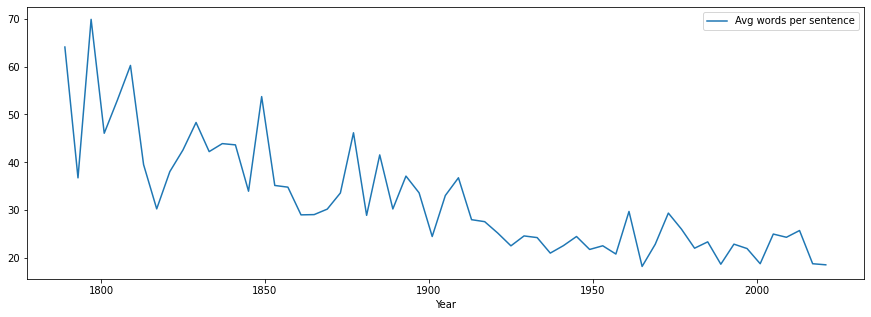

In [13]:
import matplotlib as mpl
%matplotlib inline 
data.plot("Year", figsize=(15, 5))

### Frequency Distributions

In [14]:
alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
alice_fd = nltk.FreqDist(alice) #Frequency distribution

In [15]:
rabbit_used = alice_fd["Rabbit"]
print("# of times 'Rabbit' is used:", rabbit_used)
most_common_words = alice_fd.most_common(15)
print("Most common words:", most_common_words)

# of times 'Rabbit' is used: 45
Most common words: [(',', 1993), ("'", 1731), ('the', 1527), ('and', 802), ('.', 764), ('to', 725), ('a', 615), ('I', 543), ('it', 527), ('she', 509), ('of', 500), ('said', 456), (",'", 397), ('Alice', 396), ('in', 357)]


Except for Alice, this list is made up of non-descriptive words.

In [16]:
#Word used only once in a text is called a "hapax legomena"
words_only_used_once = alice_fd.hapaxes()
print("Words only used once:", words_only_used_once[:20])

Words only used once: ['Lewis', 'Carroll', '1865', ']', 'Hole', 'conversations', 'daisy', 'chain', 'daisies', 'pink', 'wondered', 'actually', 'TOOK', 'WATCH', 'OUT', 'ITS', 'WAISTCOAT', 'POCKET', 'flashed', 'waistcoat']


These words are more descriptive, but they do not provide enough value on their own as they are so infrequently used.

#### Conditional Frequency Distribution

In [17]:
names = [("Group A", "Paul"), ("Group A", "Mike"), ("Group A", "Katy"), ("Group B", "Amy"), ("Group B", "Joe"), ("Group B", "Amy")]
name_dist = nltk.FreqDist(names)
print("Name distribution:", name_dist.most_common(10))

Name distribution: [(('Group B', 'Amy'), 2), (('Group A', 'Paul'), 1), (('Group A', 'Mike'), 1), (('Group A', 'Katy'), 1), (('Group B', 'Joe'), 1)]


In [18]:
cond_name_dist = nltk.ConditionalFreqDist(names)
print(cond_name_dist.items())

dict_items([('Group A', FreqDist({'Paul': 1, 'Mike': 1, 'Katy': 1})), ('Group B', FreqDist({'Amy': 2, 'Joe': 1}))])


#### Informative Words

Find words that are important and descriptive

In [19]:
alice_fd = nltk.FreqDist(alice)
alice_fd_100 = alice_fd.most_common(100) #100 most common words for alice in wonderland

Now, we will find the 100 most common words from another book. We will then subtract the similar words from the most common 100 words in Alice in Wonderland and then words we are left with should be unique or at least more so relevant to Alice in Wonderland

In [20]:
moby = nltk.corpus.gutenberg.words("melville-moby_dick.txt")
moby_fd = nltk.FreqDist(moby)
moby_fd_100 = moby_fd.most_common(100) #100 most common words for moby_dick

In [21]:
#Compare two collections of words
alice_100 = [word for (word, _) in alice_fd_100]
moby_100 = [word for (word, _) in moby_fd_100]
print("Alice 100 most common words:", alice_100[:10])
print("Moby 100 most common words:", moby_100[:10])

Alice 100 most common words: [',', "'", 'the', 'and', '.', 'to', 'a', 'I', 'it', 'she']
Moby 100 most common words: [',', 'the', '.', 'of', 'and', 'a', 'to', ';', 'in', 'that']


In [22]:
alice_with_moby_removed = set(alice_100) - set(moby_100)
print("Alice common words with Moby duplicate words removed: ", alice_with_moby_removed)

Alice common words with Moby duplicate words removed:  {'could', ':', "?'", 'Mock', '*', 'way', 'King', ".'", 'know', 'Turtle', 'Queen', "!'", 'see', 'say', 'll', 'thought', 'your', 'did', 'said', 'Hatter', 'Alice', 'm', 'much', 'little', 'off', 'she', 'went', 'Gryphon', 'began', ",'", 'again', 't', 'can', 'herself', 'do', 'quite'}


In [23]:
moby_with_alice_removed = set(moby_100) - set(alice_100)
print("Moby common words with Alice duplicate words removed: ", moby_with_alice_removed)

Moby common words with Alice duplicate words removed:  {'ye', 'Ahab', 'though', 'than', 'whale', 'such', 'long', 'been', 'will', 'ship', 'only', 'more', 'some', 'sea', 'old', '?', 'from', '!"', 'who', 'boat', 'other', 'any', 'now', 'we', 'him', 'which', '."', 'head', 'man', '"', 'these', 'But', 'are', 'their', 'upon', 'over'}


### Bigrams
(or 2grams or Ngrams) - ALlow us to look at combinations of words that appear next to one another

In [24]:
bigram_phrase = "I think it might rain today."
tokens = nltk.word_tokenize(bigram_phrase)
print("Tokens:", tokens)

Tokens: ['I', 'think', 'it', 'might', 'rain', 'today', '.']


In [25]:
bigrams = nltk.bigrams(tokens)

In [26]:
for item in bigrams:
    print(item)

('I', 'think')
('think', 'it')
('it', 'might')
('might', 'rain')
('rain', 'today')
('today', '.')


In [27]:
trigrams = nltk.trigrams(tokens)
for item in trigrams:
    print(item)

('I', 'think', 'it')
('think', 'it', 'might')
('it', 'might', 'rain')
('might', 'rain', 'today')
('rain', 'today', '.')


In [28]:
from nltk.util import ngrams
ngram_phrase = "If it is nice out, I will go to the beach."
ngram_tokens = nltk.word_tokenize(ngram_phrase)

bigrams_from_ngrams = ngrams(ngram_tokens, 2)
for item in bigrams_from_ngrams:
    print(item)

('If', 'it')
('it', 'is')
('is', 'nice')
('nice', 'out')
('out', ',')
(',', 'I')
('I', 'will')
('will', 'go')
('go', 'to')
('to', 'the')
('the', 'beach')
('beach', '.')


In [29]:
fourgrams = ngrams(ngram_tokens, 4)
for item in fourgrams:
    print(item)

('If', 'it', 'is', 'nice')
('it', 'is', 'nice', 'out')
('is', 'nice', 'out', ',')
('nice', 'out', ',', 'I')
('out', ',', 'I', 'will')
(',', 'I', 'will', 'go')
('I', 'will', 'go', 'to')
('will', 'go', 'to', 'the')
('go', 'to', 'the', 'beach')
('to', 'the', 'beach', '.')


In [30]:
def n_grams(text, n):
    tokens = nltk.word_tokenize(text)
    grams = ngrams(tokens, n)
    return grams

In [31]:
phrase_3 = bigram_phrase + ngram_phrase

grams = n_grams(phrase_3, 5)
for item in grams:
    print(item)

('I', 'think', 'it', 'might', 'rain')
('think', 'it', 'might', 'rain', 'today.If')
('it', 'might', 'rain', 'today.If', 'it')
('might', 'rain', 'today.If', 'it', 'is')
('rain', 'today.If', 'it', 'is', 'nice')
('today.If', 'it', 'is', 'nice', 'out')
('it', 'is', 'nice', 'out', ',')
('is', 'nice', 'out', ',', 'I')
('nice', 'out', ',', 'I', 'will')
('out', ',', 'I', 'will', 'go')
(',', 'I', 'will', 'go', 'to')
('I', 'will', 'go', 'to', 'the')
('will', 'go', 'to', 'the', 'beach')
('go', 'to', 'the', 'beach', '.')


### Regular Expressions (regex)

- Useful for finding specific patterns in text.
    - can find all words that start with `ch` or `ing`
    - can find all words that are 5 letters long and contain an `n` in the middle

Regular expressions use Metacharacters in order to match specific text cases.

##### Basic Regex metacharacters:
- `^`: Denotes the start of a string
- `$`: Denotes the end of a string
- `.`: Wild card character
- `[chr]`: Matches one of the characters
- `[a-m]`: Matches one character in the range

To find all 3 letter words in a document, we would use the following:
`^...$`
Here, the 3 dots mean any 3 characters. The carrot and dollar sign indicate the beginning and end of our expression.

To find all 3 letter words that start with the letter 'c':
`^c..$`

To find all words that start with c regardless of length: `^c`

All words that end in 'ing': `ing$`

How to find any of the words "cat", "hat", or "rat": `^[chr]at$`. Here the brackets mean that any of these letters could be used for the first character.

All words that start with the letters A, B, C, D, E, or F: `^[a-f]`

#### Advanced regex metacharacters:
- `?`: The previous character occurs 0 or 1 times
- `*`: The previous character occurs 0 or more times
- `+`: The previous character occurs 1 or more times
- `a|e`: Matches one or the other
- `()`: Parenthesis for grouping expressions
- `\`: Escape character

Expression to look for email addresses: `^.+@.+\.com$`. Here, the first dot as a wild card followed by a plus indicates that any number of characters can come before the @ symbol. The second . followed by the plus indicates the same. The backslash before the . in .com indicates that the . is used in the text and is not acting as a meta character.



In [32]:
import re #Regular expressions
alice = nltk.corpus.gutenberg.words("carroll-alice.txt")

#Looking for wards that start with new
new_words = set([word for word in alice if re.search("^new", word)])
print("New words:", new_words)

New words: {'newspapers', 'new'}


In [33]:
#Find all words that end in 'ful'
ful_words = set([word for word in alice if re.search("ful$", word)])
print("Ful words:", ful_words)

Ful words: {'doubtful', 'truthful', 'ootiful', 'wonderful', 'useful', 'mournful', 'Beautiful', 'barrowful', 'sorrowful', 'dreadful', 'hopeful', 'delightful', 'respectful', 'graceful', 'beautiful'}


In [34]:
#Search for characters that are 6 characters long and have 2 'n's in the middle
six_char_words = set([word for word in alice if re.search("^..nn..$", word)])
print("Six character words:", six_char_words)

Six character words: {'tunnel', 'fanned', 'manner', 'dinner', 'cannot'}


In [35]:
#Search for cat hat or rat:
cat_or_rat_words = set([word for word in alice if re.search("^[chr]at$", word)])
print("CHR words", cat_or_rat_words)

CHR words {'cat', 'hat', 'rat'}


In [36]:
#All words regardless of length that have 2 'n's

any_length_two_n_words = set([word for word in alice if re.search("^.*nn.*", word)])
print("Any length two n words:", any_length_two_n_words)

Any length two n words: {'beginning', 'annoyed', 'planning', 'fanned', 'manners', 'cannot', 'tunnel', 'Pennyworth', 'cunning', 'fanning', 'running', 'grinning', 'funny', 'grinned', 'annoy', 'Dinn', 'dinner', 'Ann', 'dinn', 'manner'}


In [37]:
#All words that start with a vowel with the second letter 'c' and the word ends in 'y'

custom_words = set([word for word in alice if re.search("^[aeiou]c.*y$", word)])
print("Custom words:", custom_words)

Custom words: {'actually', 'occasionally', 'accidentally'}
